# Poker Rule Induction
- Data Set: [UCI Poker Hand](https://archive.ics.uci.edu/ml/datasets/Poker+Hand)
- [Kaggle](https://www.kaggle.com/c/poker-rule-induction)

In [1]:
import math

import pandas as pd
import numpy as np
import statsmodels as stats

## Load data with Pandas

In [2]:
train = pd.read_csv('poker-hand-training-true.data', names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Type'])
test = pd.read_csv('poker-hand-testing.data', names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Type'])

In [3]:
train.iloc[44]

S1       4
C1      10
S2       4
C2      13
S3       3
C3       5
S4       2
C4       8
S5       1
C5      10
Type     1
Name: 44, dtype: int64

## Basic statistics about each column
- pd.DataFrame.descibe()
- pd.Series.value_counts()

In [4]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Type
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [5]:
for column in train.columns:
    print(train[column].value_counts())

4    6312
2    6298
3    6250
1    6150
Name: S1, dtype: int64
1     1982
9     1967
7     1961
8     1948
2     1941
12    1940
11    1926
4     1919
13    1915
5     1892
3     1882
10    1877
6     1860
Name: C1, dtype: int64
1    6309
4    6300
2    6244
3    6157
Name: S2, dtype: int64
13    2007
1     1985
6     1956
12    1939
11    1931
10    1922
2     1921
7     1912
3     1912
4     1905
8     1898
9     1877
5     1845
Name: C2, dtype: int64
4    6419
1    6230
2    6208
3    6153
Name: S3, dtype: int64
10    2000
12    1987
3     1965
4     1935
7     1927
5     1920
11    1913
8     1912
13    1910
2     1910
1     1895
6     1884
9     1852
Name: C3, dtype: int64
3    6314
1    6269
2    6248
4    6179
Name: S4, dtype: int64
3     1999
2     1987
1     1983
11    1953
9     1946
7     1943
10    1924
6     1913
4     1902
5     1883
13    1874
8     1865
12    1838
Name: C4, dtype: int64
3    6314
1    6308
4    6216
2    6172
Name: S5, dtype: int64
8     1994
1     1970

## Draw histogram of labels
- pd.Series.hist
- Distribution of labels are not normal

<IPython.core.display.Javascript object>


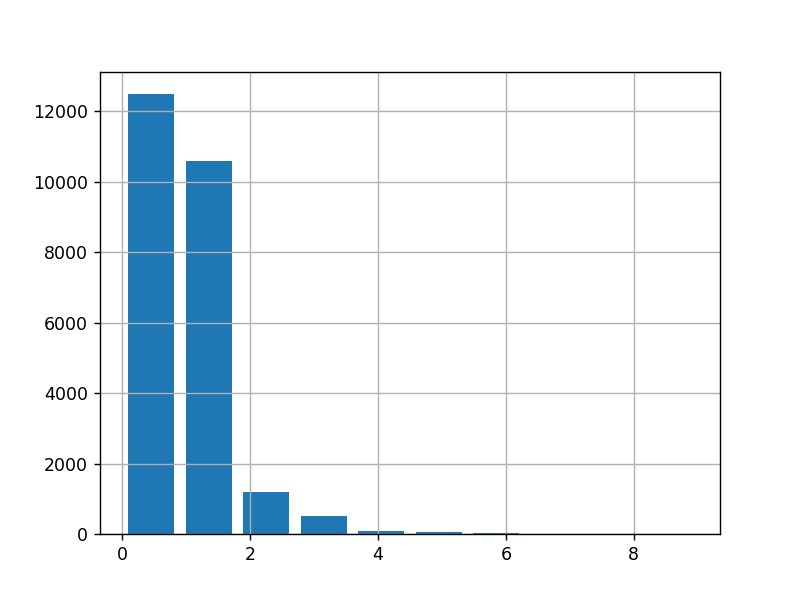

In [6]:
%matplotlib notebook
train.Type.hist(rwidth=0.8)

In [7]:
print(train.shape)
print(test.shape)

(25010, 11)
(1000000, 11)


## Split both train and test into X, y

In [8]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']

## Build a baseline
- A baseline is very important to measure improvement of the model
- With the increasement of the number of trees in a random forest, the performance will gradually increase, but not much. We need to perform feature extraction to increase performance

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']

for n in [5, 10, 20]:
    clf = RandomForestClassifier(n_estimators=n)
    clf = clf.fit(X_train, y_train)
    print(n)
    print(classification_report(y_test,clf.predict(X_test)))
    print('=============')

5
             precision    recall  f1-score   support

          0       0.57      0.69      0.63    501209
          1       0.49      0.45      0.47    422498
          2       0.18      0.02      0.04     47622
          3       0.24      0.02      0.04     21121
          4       0.06      0.00      0.01      3885
          5       0.57      0.02      0.04      1996
          6       0.02      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.51      0.54      0.52   1000000

10


C:\Users\Sean\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.58      0.74      0.65    501209
          1       0.51      0.43      0.47    422498
          2       0.21      0.01      0.03     47622
          3       0.21      0.01      0.02     21121
          4       0.09      0.00      0.00      3885
          5       0.58      0.01      0.01      1996
          6       0.00      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.52      0.55      0.53   1000000

20
             precision    recall  f1-score   support

          0       0.61      0.76      0.68    501209
          1       0.54      0.47      0.50    422498
          2       0.30      0.01      0.02     47622
          3       0.43      0.01      0.01     21121
          4       0.12      0.00      0.00      3885
          5       1.00      0.00      0

C:\Users\Sean\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Notice that all type 2,3,4,5,6,7,8,9 all have very low recall rate
- Use confusion matrix to show which type is classied wrong

In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,clf.predict(X_test)))

[[382621 118504     76      5      3      0      0      0      0      0]
 [221931 199694    744    117     10      0      2      0      0      0]
 [ 15541  31583    429     66      0      0      3      0      0      0]
 [  5148  15685    129    156      1      0      1      1      0      0]
 [   907   2962     14      0      2      0      0      0      0      0]
 [  1697    291      0      0      0      8      0      0      0      0]
 [   186   1192     34     11      0      0      1      0      0      0]
 [    17    200      7      6      0      0      0      0      0      0]
 [     4      8      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]]


In [11]:
X_train[y_train == 1]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
10,1,1,2,1,3,9,1,5,2,3
14,3,8,4,12,3,9,4,2,3,2
19,3,7,2,7,4,11,1,12,3,1
20,1,13,4,8,2,7,2,10,3,13
22,3,10,2,10,4,5,1,2,3,8
23,2,1,3,13,4,6,1,9,4,1
24,2,10,2,8,1,8,3,2,2,13
25,2,13,1,5,4,5,4,8,3,3
26,3,1,1,5,2,7,3,13,1,1
27,1,7,1,5,4,8,1,6,2,6


## Add hand count

In [12]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)


X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

In [13]:
X_train

,C1_Count,C2_Count,C3_Count,C4_Count,C5_Count,C6_Count,C7_Count,C8_Count,C9_Count,C10_Count,...,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,0,0,0,0,0,0,0,0,1,...,1,10,1,11,1,13,1,12,1,1
1,1,0,0,0,0,0,0,0,0,1,...,2,11,2,13,2,10,2,12,2,1
2,1,0,0,0,0,0,0,0,0,1,...,3,12,3,11,3,13,3,10,3,1
3,1,0,0,0,0,0,0,0,0,1,...,4,10,4,11,4,1,4,13,4,12
4,1,0,0,0,0,0,0,0,0,1,...,4,1,4,13,4,12,4,11,4,10
5,0,1,1,1,1,1,0,0,0,0,...,1,2,1,4,1,5,1,3,1,6
6,0,0,0,0,0,0,0,0,1,1,...,1,9,1,12,1,10,1,11,1,13
7,1,1,1,1,1,0,0,0,0,0,...,2,1,2,2,2,3,2,4,2,5
8,0,0,0,0,1,1,1,1,1,0,...,3,5,3,6,3,9,3,7,3,8
9,1,1,1,1,1,0,0,0,0,0,...,4,1,4,4,4,2,4,3,4,5


In [14]:
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    501209
          1       1.00      1.00      1.00    422498
          2       0.97      0.98      0.98     47622
          3       0.98      0.98      0.98     21121
          4       0.99      0.14      0.24      3885
          5       0.33      0.00      0.00      1996
          6       0.88      0.02      0.04      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.99      0.99      0.99   1000000



- F1 score for type 1 increased to 1, there are also a lot improvements for type 2 and type 3

In [15]:
X_train[y_train == 4].iloc[16]

C1_Count      0
C2_Count      0
C3_Count      0
C4_Count      0
C5_Count      0
C6_Count      0
C7_Count      0
C8_Count      0
C9_Count      1
C10_Count     1
C11_Count     1
C12_Count     1
C13_Count     1
S1            3
C1            9
S2            4
C2           10
S3            4
C3           11
S4            4
C4           12
S5            3
C5           13
Name: 3757, dtype: int64

- Focused on type 4 and noticed that it contains consecutive hands.

# Add Standard Deviation to help correctly classify Type 4

In [16]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    std = np.std(data_set[['C1', 'C2', 'C3' ,'C4', 'C5']], axis=1)
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)


clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       0.97      0.98      0.98     47622
          3       0.98      0.97      0.97     21121
          4       1.00      0.91      0.95      3885
          5       0.00      0.00      0.00      1996
          6       0.98      0.03      0.06      1424
          7       1.00      0.00      0.01       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.99      0.99      0.99   1000000



C:\Users\Sean\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
X_train[y_train==4]

,Card_Std,C1_Count,C2_Count,C3_Count,C4_Count,C5_Count,C6_Count,C7_Count,C8_Count,C9_Count,...,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
16,1.414214,1,1,1,1,1,0,0,0,0,...,1,4,1,1,1,3,3,5,3,2
402,1.414214,0,0,0,0,0,0,0,0,1,...,1,11,3,12,3,10,4,9,2,13
769,1.414214,0,0,0,0,0,0,1,1,1,...,3,9,1,10,4,11,3,7,4,8
850,1.414214,0,1,1,1,1,1,0,0,0,...,2,5,4,2,4,4,2,3,1,6
1020,1.414214,0,0,0,0,0,0,1,1,1,...,3,10,1,7,3,8,3,11,3,9
1063,1.414214,0,0,0,0,1,1,1,1,1,...,3,8,2,7,3,9,1,6,2,5
1279,1.414214,1,1,1,1,1,0,0,0,0,...,1,2,3,4,2,5,1,1,2,3
1859,1.414214,0,0,0,1,1,1,1,1,0,...,3,6,2,7,1,5,2,4,3,8
2024,1.414214,0,0,0,0,0,1,1,1,1,...,2,8,2,10,2,6,3,9,3,7
2025,1.414214,0,0,0,0,0,0,0,1,1,...,3,11,3,12,2,9,3,8,2,10


- Performance for type 4 increased a lot.
- BUG: In one specific situation, 1 can be combined with 10, 11, 12, 13 and becomes a type 4.
- FIX: Calculate std with 1, then replace all 1 with 14, calculate again, if the std is smaller, then replace old one with this one.

## Fix type 4 error

n-2, n-1, n, n+1, n+2

average = n
sqrt((2^2 + 1^2 + 0^2 + 1^2 + 2^2)/5) sqrt(2) = 1.414

In [18]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    hands = data_set[['C1', 'C2', 'C3' ,'C4', 'C5']].as_matrix()
    std = np.std(hands, axis=1)
    hands[hands == 1] = 14
    new_std = np.std(hands, axis=1)
    std[new_std < std] = new_std[new_std < std]
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      1.00    422498
          2       0.98      0.96      0.97     47622
          3       0.98      0.96      0.97     21121
          4       1.00      0.99      0.99      3885
          5       0.00      0.00      0.00      1996
          6       0.98      0.06      0.11      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.99      0.99      0.99   1000000



- Type 4 bug is fixed

In [19]:
X_train[y_train == 5].iloc[5]

Card_Std      2.727636
C1_Count      0.000000
C2_Count      0.000000
C3_Count      0.000000
C4_Count      1.000000
C5_Count      0.000000
C6_Count      0.000000
C7_Count      1.000000
C8_Count      0.000000
C9_Count      1.000000
C10_Count     1.000000
C11_Count     0.000000
C12_Count     1.000000
C13_Count     0.000000
S1            4.000000
C1            7.000000
S2            4.000000
C2            4.000000
S3            4.000000
C3           10.000000
S4            4.000000
C4            9.000000
S5            4.000000
C5           12.000000
Name: 976, dtype: float64

- Type 5 related to 3 same suits

# Add suit count

In [20]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    hands = data_set[['C1', 'C2', 'C3' ,'C4', 'C5']].as_matrix()
    std = np.std(hands, axis=1)
    hands[hands == 1] = 14
    new_std = np.std(hands, axis=1)
    std[new_std < std] = new_std[new_std < std]
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      1.00    422498
          2       0.97      0.97      0.97     47622
          3       0.98      0.96      0.97     21121
          4       1.00      1.00      1.00      3885
          5       1.00      0.09      0.17      1996
          6       0.98      0.04      0.08      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.14      0.33      0.20         3

avg / total       0.99      0.99      0.99   1000000



C:\Users\Sean\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Adding suit count is improving the result but not perfect

In [21]:
X_train[y_train == 5]

,S1_Count,S2_Count,S3_Count,S4_Count,Card_Std,C1_Count,C2_Count,C3_Count,C4_Count,C5_Count,...,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
73,0,0,0,5,2.727636,1,1,0,1,0,...,4,8,4,4,4,2,4,1,4,7
660,0,0,0,5,2.416609,1,0,1,0,1,...,4,6,4,1,4,5,4,3,4,8
698,0,0,0,5,3.544009,0,1,1,1,1,...,4,2,4,4,4,5,4,3,4,12
814,0,5,0,0,4.707441,1,0,1,1,0,...,2,12,2,1,2,13,2,4,2,3
922,5,0,0,0,3.429286,1,0,0,0,1,...,1,6,1,5,1,1,1,9,1,12
976,0,0,0,5,2.727636,0,0,0,1,0,...,4,7,4,4,4,10,4,9,4,12
990,0,0,5,0,3.709447,0,0,1,0,1,...,3,9,3,3,3,13,3,11,3,5
1508,0,0,5,0,2.856571,0,1,0,1,1,...,3,10,3,2,3,5,3,8,3,4
2557,0,0,0,5,2.000000,0,0,0,0,0,...,4,10,4,12,4,6,4,9,4,8
2793,0,0,5,0,3.720215,0,1,0,0,1,...,3,2,3,5,3,11,3,12,3,7


## Add suit value count

In [22]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    hands = data_set[['C1', 'C2', 'C3' ,'C4', 'C5']].as_matrix()
    std = np.std(hands, axis=1)
    hands[hands == 1] = 14
    new_std = np.std(hands, axis=1)
    std[new_std < std] = new_std[new_std < std]
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)


def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_value_count(X_train)
X_test = concat_suit_value_count(X_test)

clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      0.99    422498
          2       0.97      0.91      0.94     47622
          3       0.98      0.95      0.96     21121
          4       1.00      0.97      0.98      3885
          5       1.00      0.98      0.99      1996
          6       0.88      0.03      0.06      1424
          7       0.25      0.00      0.01       230
          8       1.00      0.50      0.67        12
          9       0.50      1.00      0.67         3

avg / total       0.99      0.99      0.99   1000000



- The score for type 5 is perfect now.

In [23]:
X_train[y_train == 5]

,Suit_Value_Count_0,Suit_Value_Count_1,Suit_Value_Count_2,Suit_Value_Count_3,Suit_Value_Count_4,Suit_Value_Count_5,S1_Count,S2_Count,S3_Count,S4_Count,...,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
73,3,0,0,0,0,1,0,0,0,5,...,4,8,4,4,4,2,4,1,4,7
660,3,0,0,0,0,1,0,0,0,5,...,4,6,4,1,4,5,4,3,4,8
698,3,0,0,0,0,1,0,0,0,5,...,4,2,4,4,4,5,4,3,4,12
814,3,0,0,0,0,1,0,5,0,0,...,2,12,2,1,2,13,2,4,2,3
922,3,0,0,0,0,1,5,0,0,0,...,1,6,1,5,1,1,1,9,1,12
976,3,0,0,0,0,1,0,0,0,5,...,4,7,4,4,4,10,4,9,4,12
990,3,0,0,0,0,1,0,0,5,0,...,3,9,3,3,3,13,3,11,3,5
1508,3,0,0,0,0,1,0,0,5,0,...,3,10,3,2,3,5,3,8,3,4
2557,3,0,0,0,0,1,0,0,0,5,...,4,10,4,12,4,6,4,9,4,8
2793,3,0,0,0,0,1,0,0,5,0,...,3,2,3,5,3,11,3,12,3,7


Feature ranking:
1. feature C3_Count (0.068972)
2. feature C7_Count (0.067552)
3. feature C10_Count (0.066099)
4. feature C6_Count (0.066029)
5. feature C13_Count (0.065253)
6. feature C4_Count (0.065122)
7. feature C5_Count (0.065067)
8. feature C2_Count (0.064816)
9. feature C8_Count (0.063415)
10. feature C12_Count (0.062874)
11. feature C1_Count (0.061908)
12. feature C9_Count (0.059903)
13. feature Card_Std (0.058571)
14. feature C11_Count (0.057612)
15. feature C5 (0.010590)
16. feature C1 (0.010507)
17. feature C4 (0.010304)
18. feature C2 (0.010048)
19. feature C3 (0.009755)
20. feature Suit_Value_Count_0 (0.005043)
21. feature S3 (0.004993)
22. feature S1 (0.004839)
23. feature S4 (0.004751)
24. feature S5 (0.004717)
25. feature S2 (0.004541)
26. feature S4_Count (0.004517)
27. feature S3_Count (0.004125)
28. feature S2_Count (0.004053)
29. feature S1_Count (0.003921)
30. feature Suit_Value_Count_1 (0.003175)
31. feature Suit_Value_Count_5 (0.002838)
32. feature Suit_Value_Cou

<IPython.core.display.Javascript object>


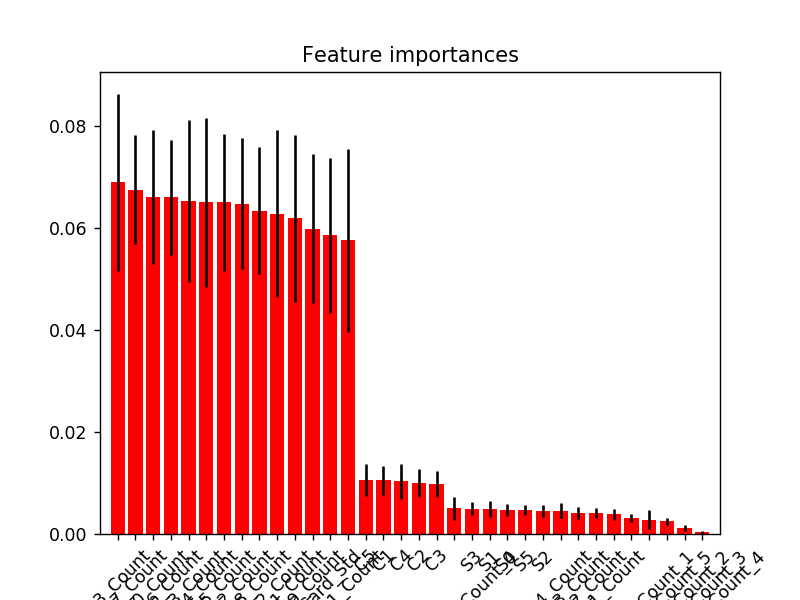

In [24]:
import matplotlib.pyplot as plt
def feature_importance(forest):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=45)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

feature_importance(clf)

## Try to remove raw features
- Too many features will cause overfitting
- Raw features contains same information as extracted features
- Raw features are harder for random forest to adapt.
- If remove raw features will harm a lot of performance, that means we haven't extracted all information from raw features yet.

In [25]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    hands = data_set[['C1', 'C2', 'C3' ,'C4', 'C5']].as_matrix()
    std = np.std(hands, axis=1)
    hands[hands == 1] = 14
    new_std = np.std(hands, axis=1)
    std[new_std < std] = new_std[new_std < std]
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)


def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_value_count(X_train)
X_test = concat_suit_value_count(X_test)

X_train = X_train.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)
X_test = X_test.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)

clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      1.00    422498
          2       0.98      0.94      0.96     47622
          3       0.98      0.95      0.96     21121
          4       1.00      0.99      1.00      3885
          5       1.00      0.99      0.99      1996
          6       0.94      0.08      0.15      1424
          7       1.00      0.02      0.04       230
          8       1.00      0.92      0.96        12
          9       0.75      1.00      0.86         3

avg / total       0.99      0.99      0.99   1000000



- The performance doesn't drop a lot.

## Add hand value count

In [26]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    hands = data_set[['C1', 'C2', 'C3' ,'C4', 'C5']].as_matrix()
    std = np.std(hands, axis=1)
    hands[hands == 1] = 14
    new_std = np.std(hands, axis=1)
    std[new_std < std] = new_std[new_std < std]
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)


def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_value_count(X_train)
X_test = concat_suit_value_count(X_test)

X_train = X_train.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)
X_test = X_test.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)

def concat_hand_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.C1_Count == i, data_set.C2_Count == i, 
                                 data_set.C3_Count == i, data_set.C4_Count == i,
                                 data_set.C5_Count == i, data_set.C6_Count == i,
                                 data_set.C7_Count == i, data_set.C8_Count == i,
                                 data_set.C9_Count == i, data_set.C10_Count == i,
                                 data_set.C11_Count == i, data_set.C12_Count == i,
                                 data_set.C13_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Card_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_hand_value_count(X_train)
X_test = concat_hand_value_count(X_test)

clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       1.00      1.00      1.00     47622
          3       1.00      1.00      1.00     21121
          4       1.00      1.00      1.00      3885
          5       1.00      1.00      1.00      1996
          6       1.00      1.00      1.00      1424
          7       1.00      1.00      1.00       230
          8       1.00      0.50      0.67        12
          9       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00   1000000



- This feature helps inprove type 6 result

In [27]:
X_train[y_train == 6].iloc[9]

Card_Value_Count_0    11.000000
Card_Value_Count_1     0.000000
Card_Value_Count_2     1.000000
Card_Value_Count_3     1.000000
Card_Value_Count_4     0.000000
Card_Value_Count_5     0.000000
Suit_Value_Count_0     0.000000
Suit_Value_Count_1     3.000000
Suit_Value_Count_2     1.000000
Suit_Value_Count_3     0.000000
Suit_Value_Count_4     0.000000
Suit_Value_Count_5     0.000000
S1_Count               2.000000
S2_Count               1.000000
S3_Count               1.000000
S4_Count               1.000000
Card_Std               0.489898
C1_Count               0.000000
C2_Count               0.000000
C3_Count               0.000000
C4_Count               0.000000
C5_Count               0.000000
C6_Count               0.000000
C7_Count               2.000000
C8_Count               3.000000
C9_Count               0.000000
C10_Count              0.000000
C11_Count              0.000000
C12_Count              0.000000
C13_Count              0.000000
Name: 7960, dtype: float64

In [28]:
X_train

,Card_Value_Count_0,Card_Value_Count_1,Card_Value_Count_2,Card_Value_Count_3,Card_Value_Count_4,Card_Value_Count_5,Suit_Value_Count_0,Suit_Value_Count_1,Suit_Value_Count_2,Suit_Value_Count_3,...,C4_Count,C5_Count,C6_Count,C7_Count,C8_Count,C9_Count,C10_Count,C11_Count,C12_Count,C13_Count
0,8,5,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,8,5,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,8,5,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,8,5,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,8,5,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,1,1,1
5,8,5,0,0,0,0,3,0,0,0,...,1,1,1,0,0,0,0,0,0,0
6,8,5,0,0,0,0,3,0,0,0,...,0,0,0,0,0,1,1,1,1,1
7,8,5,0,0,0,0,3,0,0,0,...,1,1,0,0,0,0,0,0,0,0
8,8,5,0,0,0,0,3,0,0,0,...,0,1,1,1,1,1,0,0,0,0
9,8,5,0,0,0,0,3,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

[[501209      0      0      0      0      0      0      0      0      0]
 [     0 422498      0      0      0      0      0      0      0      0]
 [     0      0  47622      0      0      0      0      0      0      0]
 [     0      0      0  21121      0      0      0      0      0      0]
 [     0      0      0      0   3885      0      0      0      0      0]
 [     0      0      0      0      0   1996      0      0      0      0]
 [     0      0      0      0      0      0   1424      0      0      0]
 [     0      0      0      0      0      0      0    230      0      0]
 [     0      0      0      0      0      6      0      0      6      0]
 [     0      0      0      0      0      0      0      0      0      3]]


- Almost perfect result
- You can add more example of type 9 by adding permuation

Feature ranking:
1. feature Card_Value_Count_0 (0.347539)
2. feature Card_Value_Count_1 (0.296474)
3. feature Card_Value_Count_2 (0.259187)
4. feature Card_Value_Count_3 (0.030254)
5. feature Card_Std (0.018653)
6. feature C13_Count (0.007056)
7. feature C1_Count (0.006654)
8. feature C8_Count (0.005036)
9. feature C12_Count (0.004155)
10. feature C3_Count (0.003190)
11. feature C2_Count (0.003161)
12. feature Suit_Value_Count_5 (0.003132)
13. feature C7_Count (0.003074)
14. feature C4_Count (0.002615)
15. feature C10_Count (0.002326)
16. feature Suit_Value_Count_0 (0.001799)
17. feature S4_Count (0.001079)
18. feature S1_Count (0.000725)
19. feature C9_Count (0.000673)
20. feature S2_Count (0.000574)
21. feature S3_Count (0.000549)
22. feature C5_Count (0.000474)
23. feature C6_Count (0.000446)
24. feature C11_Count (0.000388)
25. feature Suit_Value_Count_1 (0.000335)
26. feature Suit_Value_Count_3 (0.000195)
27. feature Card_Value_Count_4 (0.000192)
28. feature Suit_Value_Count_4 (0.

<IPython.core.display.Javascript object>


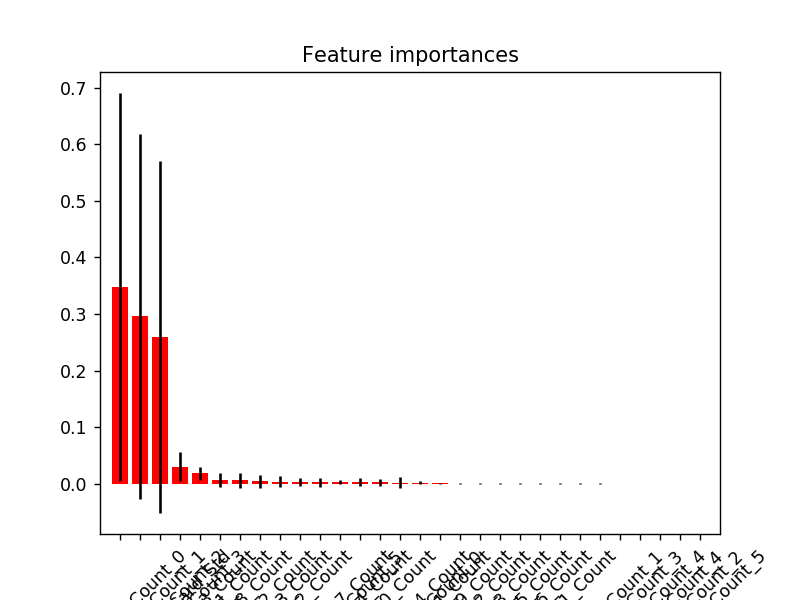

In [30]:
feature_importance(clf)